In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np


from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
def relu(x, diff = False):
    if not diff:
        y = torch.maximum(x, torch.tensor(0))
    else:
        y = (x > 0) * 1
    return y

def softmax(x):
    y = x.exp()
    return y / y.sum(dim=1, keepdims=True)

In [3]:
'Load images'


'Load images'

In [4]:
train_data = datasets.MNIST(
    root = 'mnist_data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'mnist_data', 
    train = False, 
    transform = ToTensor()
)

X_train = train_data.data.view((-1, 28*28)).float() / 255.0
X_test = test_data.data.view((-1, 28*28)).float() / 255.0

y_train = train_data.targets
y_test = test_data.targets

# Convert the target values into a "one hot" array,
# for example: 4 -> [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Y_train = torch.zeros((60000, 10))
Y_test = torch.zeros((10000, 10))
for k in range(0, 60000):
    Y_train[k, y_train[k]] = 1
for k in range(0, 10000):
    Y_test[k, y_test[k]] = 1

100.0%
100.0%
100.0%
100.0%


In [5]:
# Initialize the coefficients
g = torch.Generator().manual_seed(12345)
W1 = torch.rand((784, 256), generator=g) * 0.01
b1 = torch.zeros((1, 256))
W2 = torch.rand((256, 10), generator=g) * 0.01
b2 = torch.zeros((1, 10))

parameters = [W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

In [6]:
   ' train the network '

' train the network '

In [7]:
lr = 0.01  # Learning rate
m = 64  # Batch size

In [8]:
# Training
for epoch in range(200000): 

    # Create a batch
    ix = torch.randint(0, 60000, (m,), generator=g)
    X = X_train[ix, :]
    Y = Y_train[ix, :]
        
    # Forward pass
    Z1 = X @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = softmax(Z2)

    loss = -(Y * torch.log(A2)).sum() / m

    # Backpropagation
    for p in parameters:
        p.grad = None
    loss.backward()

    for p in parameters:
        p.data += - lr * p.grad

    if epoch % 10000 == 0:
        print(f"epoch = {epoch:6},  loss = {loss:.4}")

epoch =      0,  loss = 2.302
epoch =  10000,  loss = 0.3999
epoch =  20000,  loss = 0.3365
epoch =  30000,  loss = 0.2786
epoch =  40000,  loss = 0.103
epoch =  50000,  loss = 0.05485
epoch =  60000,  loss = 0.1026
epoch =  70000,  loss = 0.1418
epoch =  80000,  loss = 0.129
epoch =  90000,  loss = 0.04046
epoch = 100000,  loss = 0.01426
epoch = 110000,  loss = 0.02712
epoch = 120000,  loss = 0.03086
epoch = 130000,  loss = 0.06733
epoch = 140000,  loss = 0.02365
epoch = 150000,  loss = 0.02311
epoch = 160000,  loss = 0.03139
epoch = 170000,  loss = 0.00927
epoch = 180000,  loss = 0.01911
epoch = 190000,  loss = 0.02882


In [9]:
'caltulate pred'

'caltulate pred'

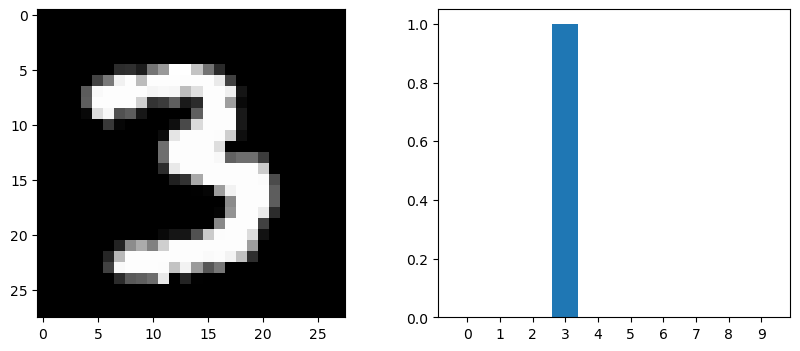

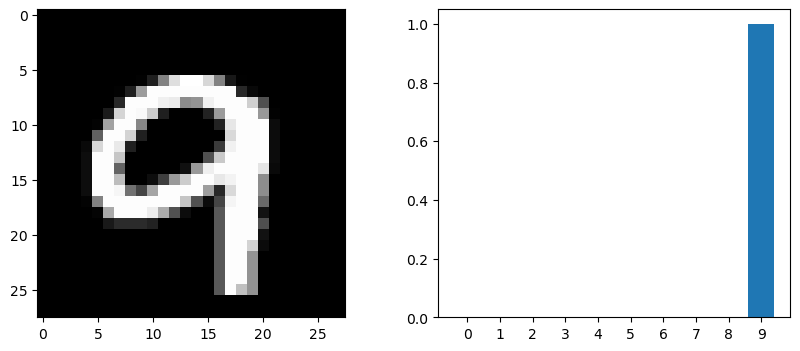

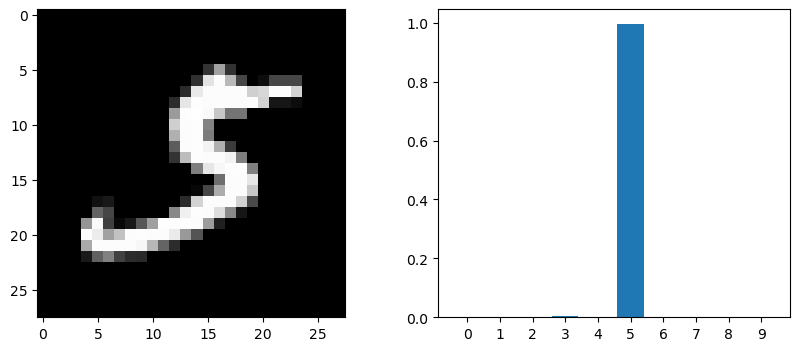

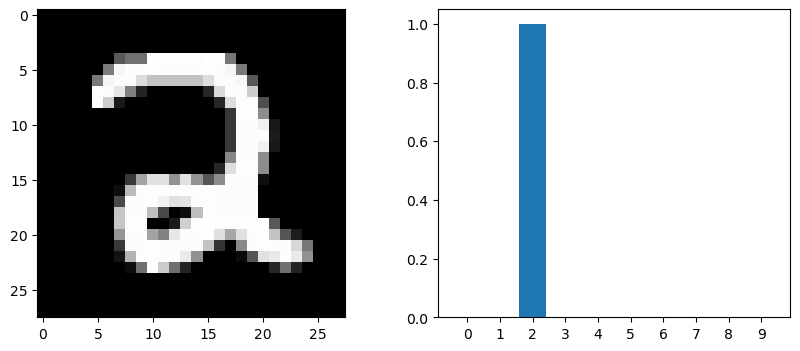

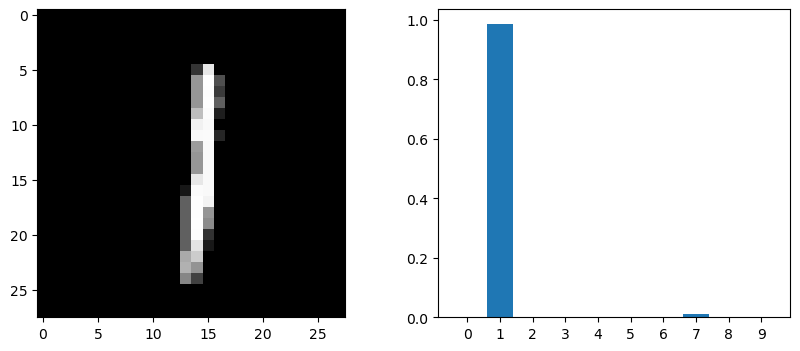

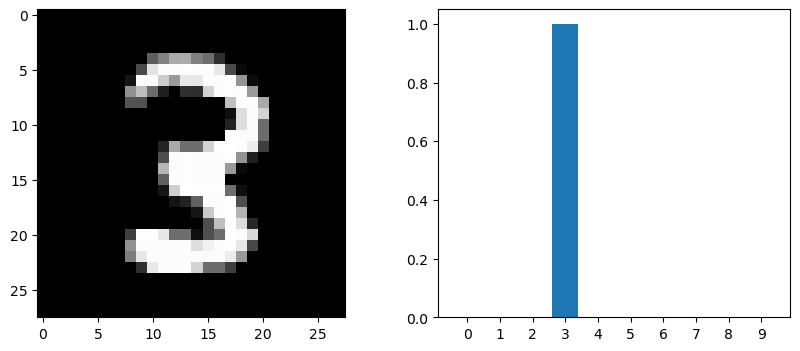

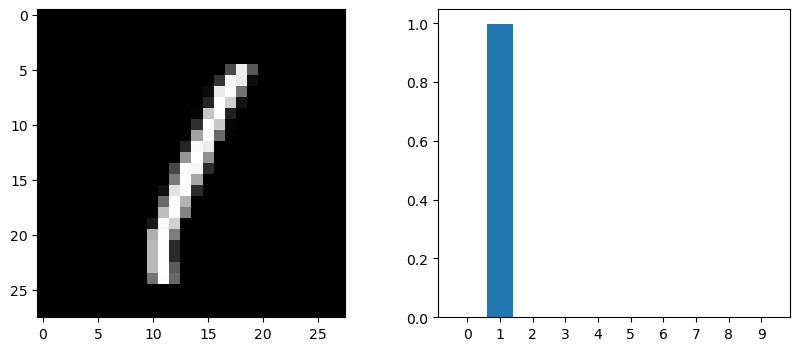

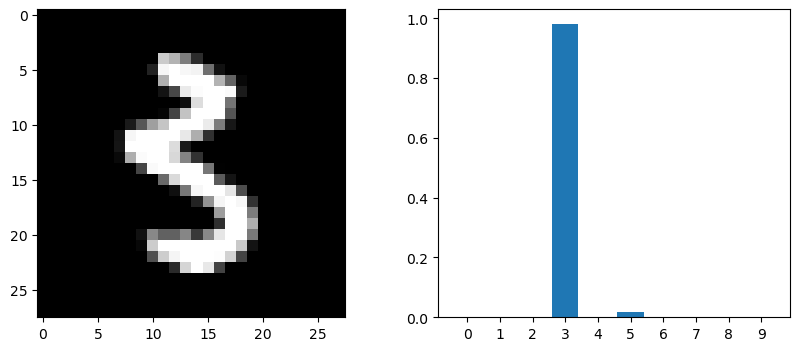

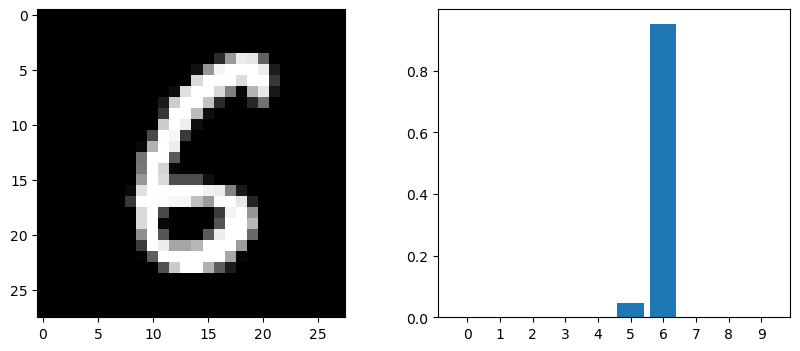

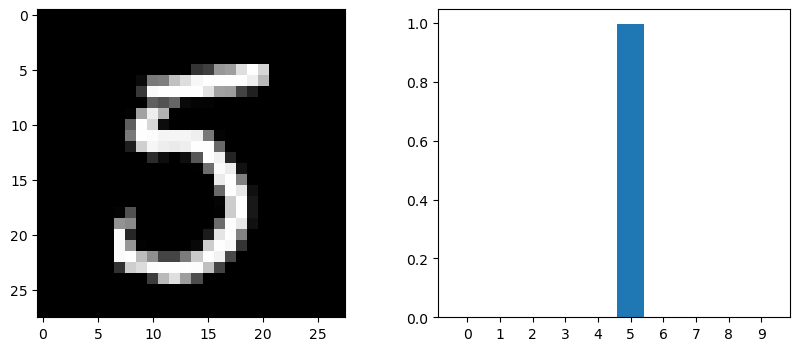

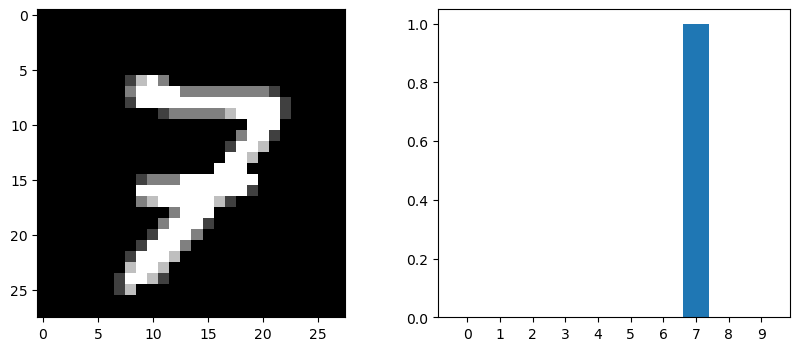

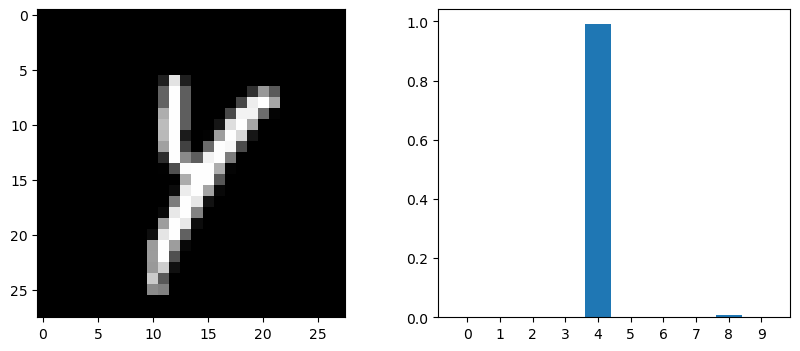

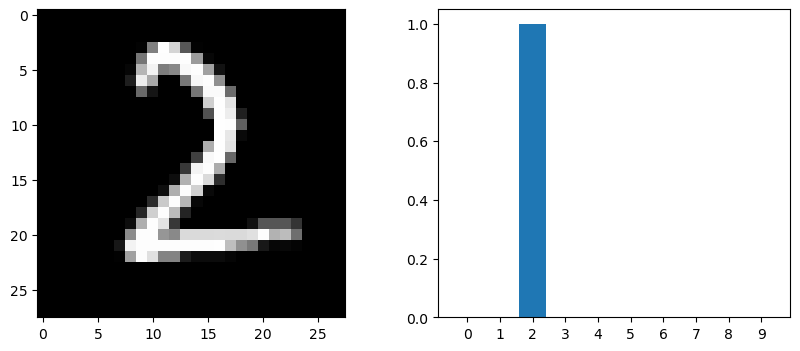

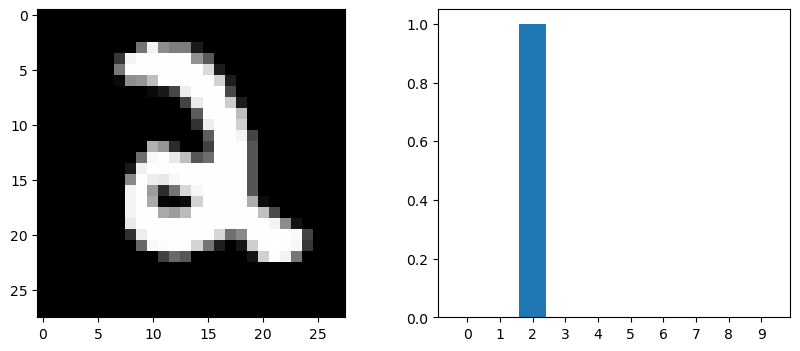

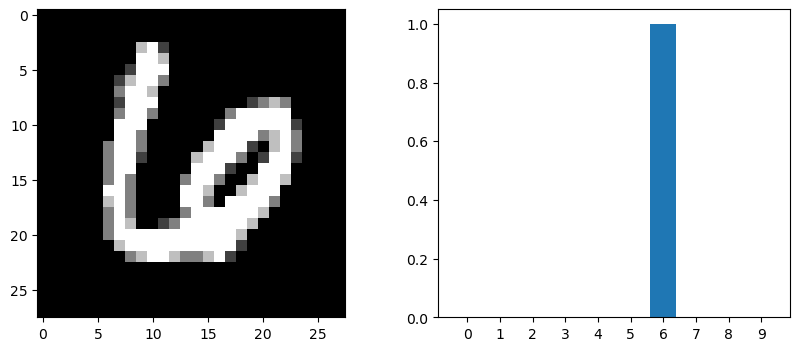

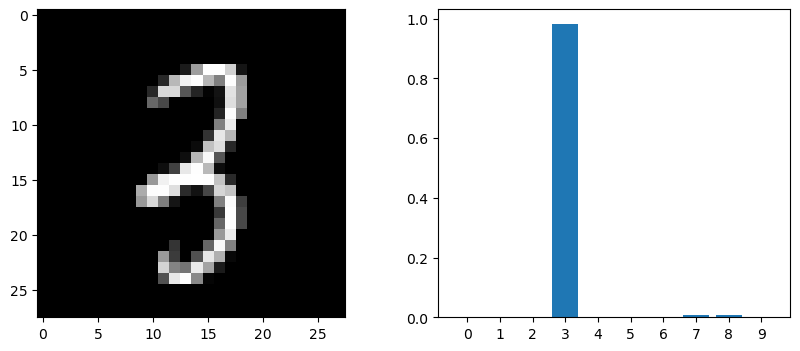

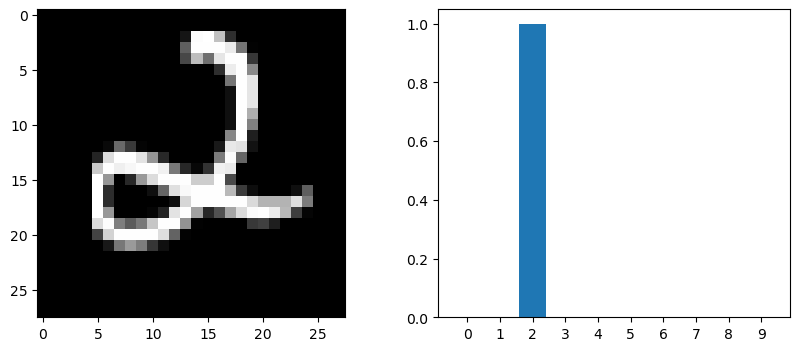

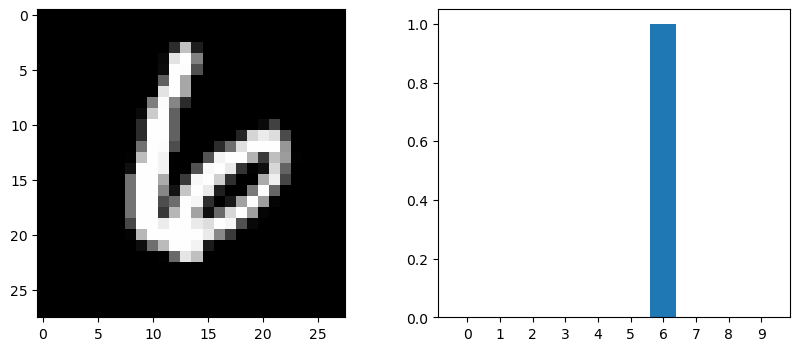

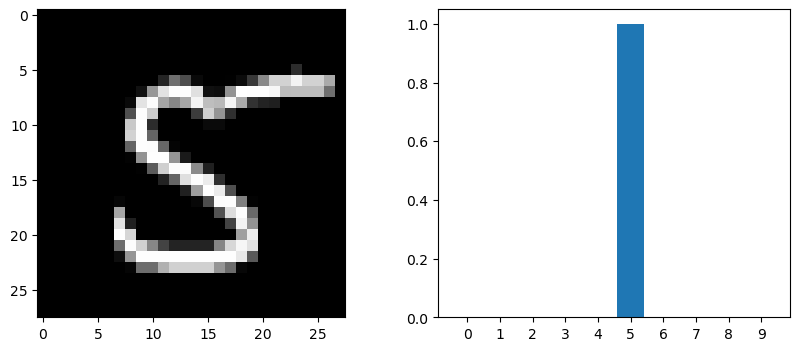

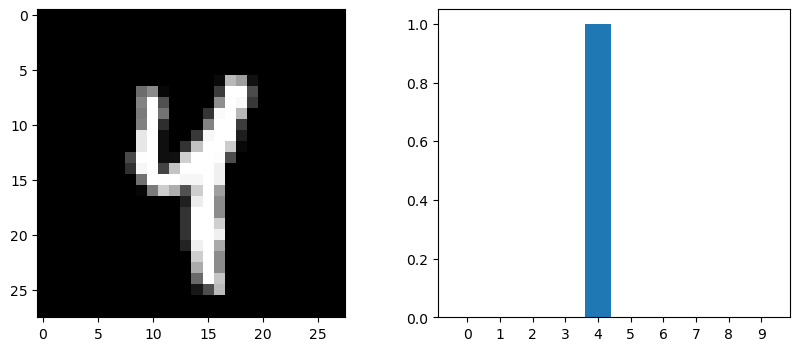

In [14]:
start = 500
for k in range(20):
    X = X_test[start+k]
    Z1 = X @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = softmax(Z2)

    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1)
    plt.imshow(X.view(28, 28), cmap='gray')
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
    plt.bar(ind, A2.detach().numpy().flatten())
    plt.xticks(range(10))

In [11]:
'cal accuracy'

'cal accuracy'

In [15]:
X = X_test
Z1 = X @ W1 + b1
A1 = relu(Z1)
Z2 = A1 @ W2 + b2
A2 = softmax(Z2)
Y_hat = A2.argmax(dim=1)
print(f"Accuracy = {(Y_hat == y_test).sum()/len(y_test):.4}")
#show loss
print(f"loss = {-(Y_test * torch.log(A2)).sum() / 10000:.4}")

Accuracy = 0.9787
loss = 0.06877
